# Description

# Imports

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

# General settings

In [3]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [4]:
device

'cuda'

# Generating datapoints

In [12]:
def generate_regression_point(x, mean=0, std=0.02):
    # Create sample from noise random variable 
    mean = mean
    std = std
    epsilon = np.random.normal(loc=mean, scale=std)
    # Create noisy x
    x_noisy = x + epsilon
    
    # Create output value
    y = 10.0 * np.sin(2*math.pi*(x_noisy))
    return y

In [31]:
# Generate dataset
# X = torch.tensor([-4, -3, -2, -1, 1, 2, 3, 4]).reshape(-1,1)
X = torch.linspace(-0.5, 0.5, 32, dtype=torch.float32).reshape(-1,1)
y = generate_regression_point(X)
X_test = torch.linspace(-1.0, 1.0, 32, dtype=torch.float32).reshape(-1,1)
y_test = generate_regression_point(X_test)

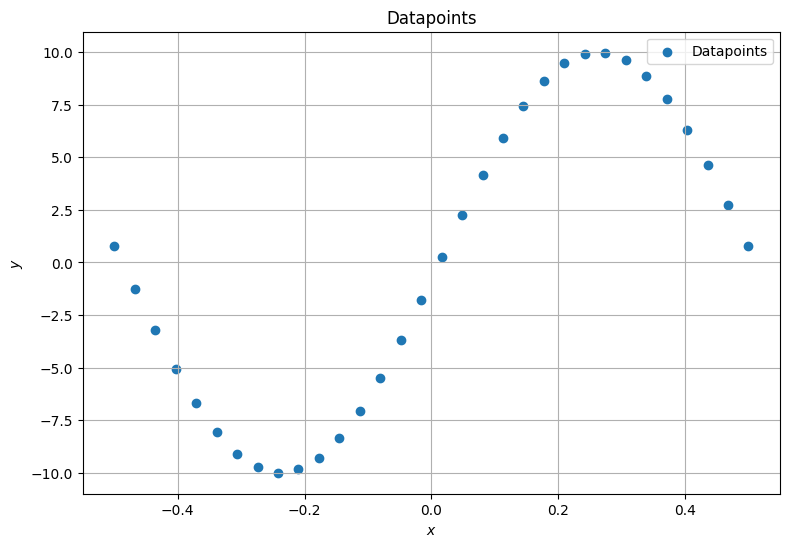

In [32]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y, label="Datapoints")
plt.title("Datapoints")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

# Learning the regression function with a standard neural network

In [33]:
import torch.nn.functional as F

class Neural_Network(nn.Module):
    def __init__(self, hidden_size=32):
        super().__init__()
        self.l1 = nn.Linear(1, hidden_size)
        self.l2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

In [44]:
# Initialize neural network
net1 = Neural_Network(hidden_size=20).to(device)

# Specify the loss - MSE loss for regression
loss_fn = nn.MSELoss()

# Specify optimizer - Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(net1.parameters(), lr=0.05)

# Train the model
epochs = 5000

for epoch in tqdm(range(epochs)):
    # zero gradients
    optimizer.zero_grad()
    # pass forward 
    y_pred = net1(X.to(device))
    # evaluate performance
    loss = loss_fn(y_pred, y.to(device))
    # calculate the gradients
    loss.backward()
    # update weights
    optimizer.step()
    # print progress
    if epoch % 100 == 0:
        print("loss: {} | epoch {}".format(loss, epoch))
print('Training complete')

  3%|▎         | 130/5000 [00:00<00:03, 1295.84it/s]

loss: 48.407318115234375 | epoch 0
loss: 17.776432037353516 | epoch 100
loss: 15.607973098754883 | epoch 200


 10%|█         | 522/5000 [00:00<00:03, 1128.75it/s]

loss: 13.105897903442383 | epoch 300
loss: 12.371362686157227 | epoch 400
loss: 11.607013702392578 | epoch 500


 17%|█▋        | 874/5000 [00:00<00:02, 1463.85it/s]

loss: 10.715167999267578 | epoch 600
loss: 11.40388298034668 | epoch 700
loss: 11.22736644744873 | epoch 800
loss: 11.034464836120605 | epoch 900


 24%|██▍       | 1198/5000 [00:00<00:02, 1362.36it/s]

loss: 10.93910026550293 | epoch 1000
loss: 9.684532165527344 | epoch 1100
loss: 7.090548992156982 | epoch 1200


 30%|██▉       | 1480/5000 [00:01<00:02, 1333.67it/s]

loss: 6.517299652099609 | epoch 1300
loss: 5.231290817260742 | epoch 1400
loss: 4.530215263366699 | epoch 1500


 36%|███▋      | 1814/5000 [00:01<00:02, 1502.92it/s]

loss: 3.871196746826172 | epoch 1600
loss: 3.333289861679077 | epoch 1700
loss: 2.883366823196411 | epoch 1800
loss: 2.4991369247436523 | epoch 1900


 47%|████▋     | 2327/5000 [00:01<00:01, 1639.53it/s]

loss: 2.1499781608581543 | epoch 2000
loss: 1.8627307415008545 | epoch 2100
loss: 1.609025001525879 | epoch 2200
loss: 1.394768238067627 | epoch 2300


 50%|████▉     | 2493/5000 [00:01<00:01, 1362.35it/s]

loss: 1.348057746887207 | epoch 2400
loss: 1.8259119987487793 | epoch 2500


 53%|█████▎    | 2638/5000 [00:02<00:02, 1010.95it/s]

loss: 1.5423508882522583 | epoch 2600
loss: 1.3461811542510986 | epoch 2700


 57%|█████▋    | 2859/5000 [00:02<00:02, 766.47it/s] 

loss: 1.2242717742919922 | epoch 2800
loss: 1.1423187255859375 | epoch 2900


 62%|██████▏   | 3098/5000 [00:02<00:02, 635.35it/s]

loss: 1.0611443519592285 | epoch 3000
loss: 1.8632993698120117 | epoch 3100


 66%|██████▋   | 3313/5000 [00:03<00:02, 664.25it/s]

loss: 1.6596550941467285 | epoch 3200
loss: 1.4921300411224365 | epoch 3300


 70%|███████   | 3508/5000 [00:03<00:02, 587.94it/s]

loss: 1.346999168395996 | epoch 3400
loss: 1.1773808002471924 | epoch 3500


 74%|███████▍  | 3700/5000 [00:03<00:02, 621.07it/s]

loss: 1.0577925443649292 | epoch 3600
loss: 0.987228512763977 | epoch 3700


 78%|███████▊  | 3894/5000 [00:04<00:01, 603.45it/s]

loss: 0.9537217020988464 | epoch 3800
loss: 0.9177927374839783 | epoch 3900


 81%|████████▏ | 4072/5000 [00:04<00:01, 561.46it/s]

loss: 0.8268545269966125 | epoch 4000
loss: 0.7412660717964172 | epoch 4100


 86%|████████▌ | 4297/5000 [00:04<00:01, 536.77it/s]

loss: 0.6679764986038208 | epoch 4200
loss: 0.5901327133178711 | epoch 4300


 89%|████████▉ | 4458/5000 [00:05<00:01, 521.11it/s]

loss: 0.5586506128311157 | epoch 4400
loss: 0.5401440858840942 | epoch 4500


 94%|█████████▎| 4685/5000 [00:05<00:00, 545.54it/s]

loss: 0.5287480354309082 | epoch 4600
loss: 0.5193302035331726 | epoch 4700


 98%|█████████▊| 4909/5000 [00:06<00:00, 550.51it/s]

loss: 0.5120240449905396 | epoch 4800
loss: 0.5016781091690063 | epoch 4900


100%|██████████| 5000/5000 [00:06<00:00, 801.40it/s]

Training complete


In [45]:
# X_test = torch.linspace(-1, 1, 100, dtype=torch.float32).reshape(-1,1)
y_pred = net1(X_test.to(device))

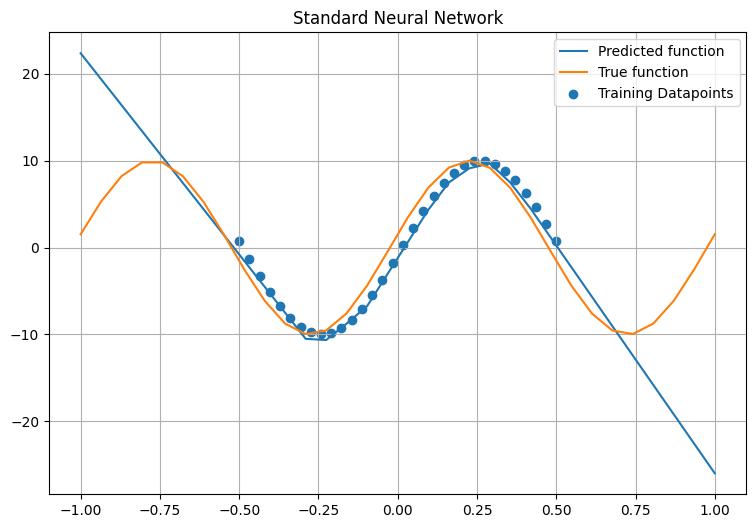

In [46]:
plt.figure(figsize=(9, 6))
plt.plot(X_test.detach().cpu(), y_pred.detach().cpu(), label = "Predicted function")
plt.plot(X_test.detach().cpu(), y_test.detach().cpu(), label = "True function")
plt.scatter(X, y, label = "Training Datapoints")
plt.title("Standard Neural Network")
plt.legend()
plt.grid()
plt.show()

Now, the aim is to verify the extrapolation quality of the model

The neural network is overcofindent with regard to predictions outside the data-domain provided during training.

# Learning the regression function with a Bayesian neural network

In [60]:
class Bayesian_Layer(nn.Module):
    """
    Layer used for the Bayesian neurwork.
    """
    def __init__(self, input_feats, output_feats):
        """
        Layer init
        Prior follows a normal distribution with given mean and variance.
        """
        # initialize
        super().__init__()
        
        # Define input and output dims
        self.input_feats = input_feats
        self.output_feats = output_feats
        self.init_sigma = 1.0
        
        # Initialize mu and sigma for the layer weights
        mu_w = torch.distributions.Normal(0,self.init_sigma).sample((output_feats, input_feats))
        self.mu_w = nn.Parameter(mu_w)
        rho_w = torch.zeros(output_feats, input_feats)
        self.rho_w = nn.Parameter(rho_w)
        
        # Initialize mu and sigma for the layer bias
        mu_b = torch.distributions.Normal(0,self.init_sigma).sample((output_feats,))
        self.mu_b = nn.Parameter(mu_b)
        rho_b = torch.zeros(output_feats,)
        self.rho_b = nn.Parameter(rho_b)
        
        # Define weight and bias samples
        self.w = None
        self.b = None
        
        # Define the weight and bias prior distribution
        self.prior_distrib = torch.distributions.Normal(0, self.init_sigma)
        # Define the distribution for epsilon
        self.eps_distrib = torch.distributions.Normal(0, self.init_sigma)
        
    def forward(self, x):
        """
        The forward function 
        """
        # Perform a weight sampling
        # Sample epsilon
        eps_w = self.eps_distrib.sample(self.mu_w.shape).to(device)
        # Compute weight
        self.w = self.mu_w + eps_w * F.softplus(self.rho_w)
        
        # Perform a bias sampling
        # Sample epsilon
        eps_b = self.eps_distrib.sample(self.mu_b.shape).to(device)
        # Compute bias
        self.b = self.mu_b + eps_b * F.softplus(self.rho_b)
        
        
        # Calculate log prior
        # Evaluate log probability 
        w_prior_log_prob = self.prior_distrib.log_prob(self.w)
        b_prior_log_prob = self.prior_distrib.log_prob(self.b)
        # Calculate log prior
        self.log_prior = torch.mean(w_prior_log_prob) + torch.mean(b_prior_log_prob)
        
        # Calculate log (variational) posterior
        # Define distributions
        # Weights
        mu_post_w = self.mu_w.data
        rho_post_w = self.rho_w.data
        self.post_w_distrib = torch.distributions.Normal(mu_post_w, F.softplus(rho_post_w))
        # Bias
        mu_post_b = self.mu_b.data
        rho_post_b = self.rho_b.data
        self.post_b_distrib = torch.distributions.Normal(mu_post_b, F.softplus(rho_post_b))
        # Evaluate log probability 
        w_post_log_prob = self.post_w_distrib.log_prob(self.w)
        b_post_log_prob = self.post_b_distrib.log_prob(self.b)
        # Calculate log variational posterior
        self.log_post = torch.mean(w_post_log_prob) + torch.mean(b_post_log_prob)
        
        return F.linear(x, self.w, self.b)

In [69]:
class Bayesian_Network(nn.Module):
    """
    Bayesian Network class.
    """
    def __init__(self, hidden_size=64):
        # Initialize
        super().__init__()
        
        # Define layers
        self.l1 = Bayesian_Layer(input_feats=1, output_feats=hidden_size)
        self.l2 = Bayesian_Layer(input_feats=hidden_size, output_feats=hidden_size)
        self.l3 = Bayesian_Layer(input_feats=hidden_size, output_feats=1)
        
    def forward(self, x):
        # Define the network architecture
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
    def net_log_prior(self):
        # Compute the network's log prior
        return self.l1.log_prior + self.l2.log_prior + self.l3.log_prior
    
    def net_log_post(self):
        # Compute the network's log posterior
        return self.l1.log_post + self.l2.log_post + self.l3.log_post
    
    def compute_loss(self, inputs, targets):
        # Predict outputs
        y_pred = self(inputs).reshape(-1) # use network to predict
        
        # compute log prior and posterior
        log_prior = self.net_log_prior() # compute the log prior
        log_post = self.net_log_post() # compute the log posterior
        
        # compute log likelihood
        log_likelihood_distrib = torch.distributions.Normal(y_pred, 1.0) 
        log_likelihood = log_likelihood_distrib.log_prob(targets.reshape(-1))
        
        # compute the loss (negative ELBO)
        loss = log_post - log_prior - log_likelihood
        # loss = -log_likelihood
        
        return loss.mean()

In [92]:
# Initialize neural network
net2 = Bayesian_Network(hidden_size=64).to(device)

# Specify optimizer - Adam optimizer
optimizer = torch.optim.Adam(net2.parameters(), lr=0.08)

# Train the model
epochs = 6000

for epoch in tqdm(range(epochs)):
    # zero gradients
    optimizer.zero_grad()
    # pass forward and evaluate 
    loss = net2.compute_loss(X.to(device), y.to(device))
    # calculate the gradients
    loss.backward()
    # update weights
    optimizer.step()
    # print progress
    if epoch % 1000 == 0:
        print("loss: {} | prior: {} | posterior: {} | epoch {}".format(loss.item(), net2.net_log_prior(), net2.net_log_post(), epoch))
print('Training complete')

  0%|          | 16/6000 [00:00<01:17, 76.84it/s]

loss: 470.10601806640625 | prior: -10.38831901550293 | posterior: -5.622636318206787 | epoch 0


 17%|█▋        | 1009/6000 [00:14<01:10, 71.21it/s]

loss: 18.099761962890625 | prior: -9.268770217895508 | posterior: -5.495492935180664 | epoch 1000


 34%|███▎      | 2011/6000 [00:28<00:52, 76.64it/s]

loss: 11.661506652832031 | prior: -8.832128524780273 | posterior: -5.482883453369141 | epoch 2000


 50%|█████     | 3009/6000 [00:40<00:41, 72.52it/s] 

loss: 7.1011552810668945 | prior: -9.016129493713379 | posterior: -5.16080379486084 | epoch 3000


 67%|██████▋   | 4008/6000 [00:53<00:30, 64.97it/s] 

loss: 8.999748229980469 | prior: -8.785149574279785 | posterior: -5.232702732086182 | epoch 4000


 84%|████████▍ | 5033/6000 [01:06<00:06, 156.21it/s]

loss: 11.351158142089844 | prior: -9.002361297607422 | posterior: -5.015415668487549 | epoch 5000


100%|██████████| 6000/6000 [01:17<00:00, 77.37it/s] 

Training complete


Now, we verify the quality of the resultss. For that we generate for one single input X multiple output samples. We, then, aggregate the results.

In [93]:
output_mc_samples = 10

In [94]:
y_test_samples = np.zeros((output_mc_samples, len(X_test)))

for i in range(output_mc_samples):
    y_temp = net2(X_test.to(device)).cpu().detach().numpy()
    y_test_samples[i] = y_temp.reshape(-1)

plot

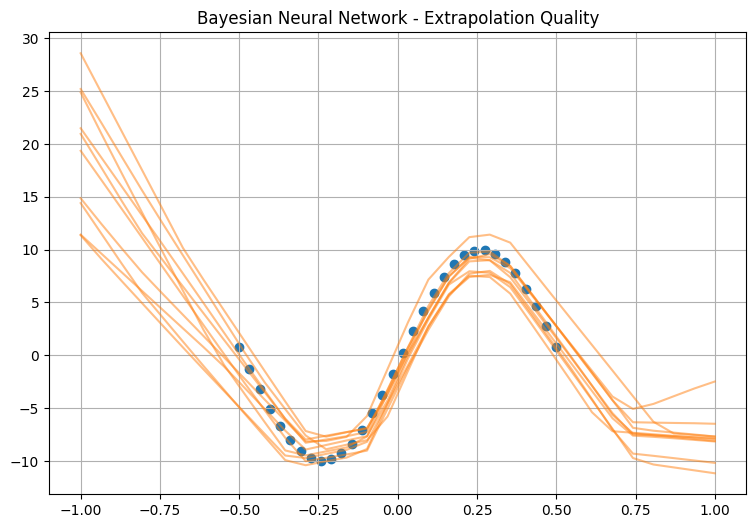

In [101]:
plt.figure(figsize=(9, 6))
for i in range(output_mc_samples):
    plt.plot(X_test, y_test_samples[i], color='C1', alpha=0.5)
plt.scatter(X, y)
plt.title("Bayesian Neural Network - Extrapolation Quality")
plt.grid()
plt.show()

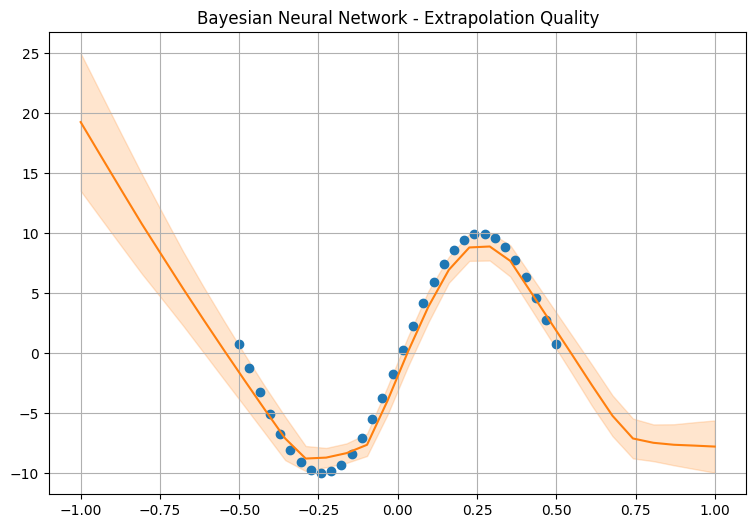

In [105]:
plt.figure(figsize=(9, 6))
plt.plot(X_test, y_test_samples.mean(0), color='C1')
upper = y_test_samples.mean(0) + y_test_samples.std(0)
lower = y_test_samples.mean(0) - y_test_samples.std(0)
plt.fill_between(X_test.mean(1), upper, lower, color='C1', alpha=0.2)
plt.scatter(X, y)
plt.title("Bayesian Neural Network - Extrapolation Quality")
plt.grid()
plt.show()